In [1]:
import os
import glob
import torch
import re
import pandas as pd
import torchvision.transforms as transforms
import cv2
from PIL import Image


DATA_DIR = r"D:\Documents\datasets\AIST4010\muse"
SPEC_DIR = os.path.join(DATA_DIR, "spectrograms_jpg")
songs_data_fp = os.path.join(DATA_DIR, "extracted_data.csv")


def load_imgs(fp=SPEC_DIR):
    fp = glob.glob(os.path.join(fp, '*'))
    rematch_pattern = r"^.*\\([^\.]*).jpg"
    fp.sort(key=lambda fp: re.match(rematch_pattern, fp).group(1))
    imgs = [None] * len(fp)
    img_ids = [None] * len(fp)
    transform = transforms.ToTensor()
    for idx, img_fp in enumerate(fp):
        img_id = re.match(rematch_pattern, img_fp).group(1)
        with Image.open(img_fp) as f:
            imgs[idx] = f.convert("RGB")
        img_ids[idx] = img_id
    return imgs, img_ids

In [2]:
songs_data = pd.read_csv(songs_data_fp)
data, ids = load_imgs()

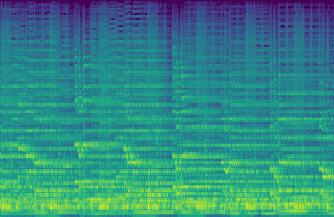

In [21]:
data[1]

In [3]:
import numpy as np

valence = songs_data.valence_tags
arousal = songs_data.arousal_tags
dominance = songs_data.dominance_tags

valence_projected = valence/9
arousal_projected = arousal/9
dominace_projected = dominance/9

val_min, val_max = np.min(valence), np.max(valence)
aro_min, aro_max = np.min(arousal), np.max(arousal)
dom_min, dom_max = np.min(dominance), np.max(dominance)

range_start, range_end = -1, 1
val_minmax = (valence - val_min) / (val_max - val_min) * (range_end - range_start) + range_start
aro_minmax = (arousal - val_min) / (aro_max - aro_min) * (range_end - range_start) + range_start
dom_minmax = (dominance - val_min) / (dom_max - dom_min) * (range_end - range_start) + range_start

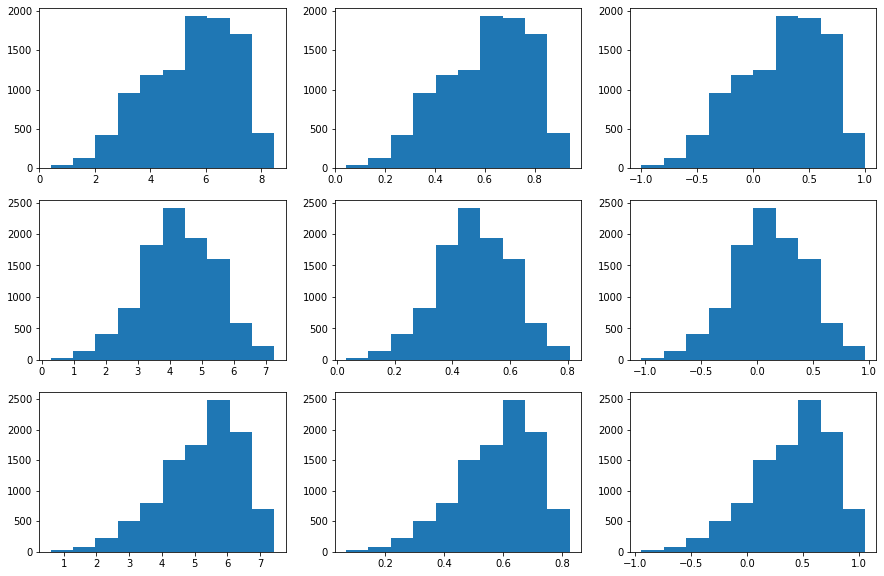

In [27]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 3, figsize=(15, 10))
data = [valence, valence_projected, val_minmax,
        arousal, arousal_projected, aro_minmax,
        dominance, dominace_projected, dom_minmax]
for idx, d in enumerate(data):
    axs[idx//3, idx%3].hist(d)
plt.show()

In [19]:
from sklearn.preprocessing import MinMaxScaler

valence_values = valence.values.reshape(-1, 1)
valence_scaler = MinMaxScaler(feature_range=(-1, 1))
valence_scaler.fit(valence_values)
val_minmax_sklearn = valence_scaler.transform(valence_values)

(217, 334, 3)

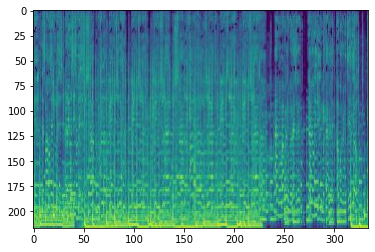

In [70]:
import numpy as np
import matplotlib.pyplot as plt

data0 = np.asarray(data[0])
# data0[20:30] = 0
# data0 = data0.transpose(1, 0, 2)
# data0[20:30] = 0
# data0 = data0.transpose(1, 0, 2)
plt.imshow(data0)
data0.shape

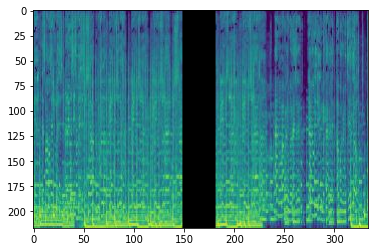

In [71]:
from torchvision import transforms

data0 = transforms.ToTensor()(data0)
data0 = data0.permute(2, 1, 0)
freq_range, time_range = data0.shape[:2]
mask_area = int((freq_range * 0.1) // 1)
mask_start = np.random.randint(mask_area, freq_range - mask_area)
data0[mask_start:(mask_start+mask_area), :] = 0
data0 = data0.permute(2, 1, 0)
plt.imshow(data0.permute(1, 2, 0))

In [63]:
mask_start, mask_area

(44, 21.0)